In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#load dataset as cifar10 from tensorflow
cifar = tf.keras.datasets.cifar10

# divide the dataset in training and testing data sets
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
y_train.shape

(50000, 1)

In [21]:
x_test.shape

(10000, 32, 32, 3)

In [22]:
y_test.shape

(10000, 1)

In [23]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [24]:
x_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 69s 86ms/step - loss: 1.6136 - accuracy: 0.4072 - val_loss: 1.3181 - val_accuracy: 0.5222
Epoch 2/10
782/782 [==============================] - 69s 88ms/step - loss: 1.2487 - accuracy: 0.5542 - val_loss: 1.1381 - val_accuracy: 0.5909
Epoch 3/10
782/782 [==============================] - 67s 85ms/step - loss: 1.0931 - accuracy: 0.6156 - val_loss: 1.0598 - val_accuracy: 0.6205
Epoch 4/10
782/782 [==============================] - 66s 84ms/step - loss: 0.9893 - accuracy: 0.6562 - val_loss: 1.0452 - val_accuracy: 0.6340
Epoch 5/10
782/782 [==============================] - 65s 84ms/step - loss: 0.9214 - accuracy: 0.6782 - val_loss: 0.9390 - val_accuracy: 0.6727
Epoch 6/10
782/782 [==============================] - 65s 83ms/step - loss: 0.8605 - accuracy: 0.6977 - val_loss: 0.9079 - val_accuracy: 0.6840
Epoch 7/10
782/782 [==============================] - 65s 84ms/step - loss: 0.8111 - accuracy: 0.7168 - val_loss: 0.9270 - val_accuracy:

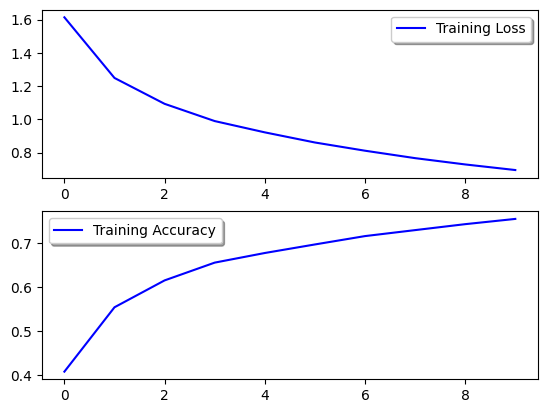

In [27]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [28]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

313/313 [==============================] - 5s 15ms/step - loss: 0.8968 - accuracy: 0.6974
Test loss: 0.8968461751937866
Test accuracy: 0.6973999738693237
